##### Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
#pip install mlxtend

In [6]:
from mlxtend.frequent_patterns import apriori, association_rules

In [144]:
from sklearn.model_selection import GridSearchCV

##### Load the Data

In [7]:
mark_spend = pd.read_csv("C://Users//sandisk//Downloads//ML using Python//Case Studies//14. Capstone Case Study - Finding-Marketing-Insights//Datasets//Marketing_Spend.csv//")

In [8]:
mark_spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [9]:
mark_spend['Date'] = pd.to_datetime(mark_spend['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')

In [10]:
mark_spend['Date'] = pd.to_datetime(mark_spend['Date'])

In [11]:
tax_amnt = pd.read_excel("C://Users//sandisk//Downloads//ML using Python//Case Studies//14. Capstone Case Study - Finding-Marketing-Insights//Datasets//Tax_amount.xlsx//")

In [12]:
tax_amnt.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [13]:
disc_copn = pd.read_csv("C://Users//sandisk//Downloads//ML using Python//Case Studies//14. Capstone Case Study - Finding-Marketing-Insights//Datasets//Discount_Coupon.csv//")

In [14]:
disc_copn.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [15]:
on_sales = pd.read_csv("C://Users//sandisk//Downloads//ML using Python//Case Studies//14. Capstone Case Study - Finding-Marketing-Insights//Datasets//Online_Sales.csv//")

In [16]:
on_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [17]:
on_sales['Transaction_Date'] = pd.to_datetime(on_sales['Transaction_Date'], format='%Y%m%d')

In [18]:
on_sales['Transaction_Date']

0       2019-01-01
1       2019-01-01
2       2019-01-01
3       2019-01-01
4       2019-01-01
           ...    
52919   2019-12-31
52920   2019-12-31
52921   2019-12-31
52922   2019-12-31
52923   2019-12-31
Name: Transaction_Date, Length: 52924, dtype: datetime64[ns]

In [19]:
cust_data = pd.read_excel("C://Users//sandisk//Downloads//ML using Python//Case Studies//14. Capstone Case Study - Finding-Marketing-Insights//Datasets//CustomersData.xlsx//")

In [20]:
cust_data.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


##### Merge the datasets

1.CustomerData + Online_Sales

merged_data1 = pd.merge(on_sales, cust_data, on='CustomerID', how='left')

---Extract month from Transaction_Date for joining with Discount_Coupon data

merged_data1['Transaction_Month'] = pd.to_datetime(merged_data1['Transaction_Date']).dt.to_period('M')

disc_copn['Month'] = pd.to_datetime(disc_copn['Month']).dt.to_period('M')

2.+ Discount_Coupon

merged_data2 = pd.merge(merged_data1, disc_copn, left_on=['Product_Category', 'Transaction_Month'], right_on=['Product_Category', 'Month'], how='left')

3.+ Marketing Spend

merged_data3 = pd.merge(merged_data2, mark_spend, left_on='Transaction_Date', right_on='Date', how='left')

4.+ Tax_Amount

sales_df = pd.merge(merged_data3, tax_amnt, on='Product_Category', how='left')

In [21]:
merged_data1 =   pd.merge(on_sales, cust_data, on='CustomerID', how='left')

In [22]:
merged_data1['Transaction_Month'] = pd.to_datetime(merged_data1['Transaction_Date']).dt.strftime('%b')

In [23]:
merged_data2 = pd.merge(merged_data1, disc_copn, left_on=['Product_Category', 'Transaction_Month'], right_on = ['Product_Category ', 'Month'])

In [24]:
merged_data3 = pd.merge(merged_data2, mark_spend, left_on='Transaction_Date', right_on='Date', how='left')

In [25]:
sales_df = pd.merge(merged_data3, tax_amnt, on='Product_Category', how='left')

In [26]:
sales_df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Transaction_Month', 'Month', 'Product_Category ',
       'Coupon_Code', 'Discount_pct', 'Date', 'Offline_Spend', 'Online_Spend',
       'GST'],
      dtype='object')

In [27]:
sales_df.drop(columns = ['Date', 'Month','Product_Category '], inplace = True)

In [28]:
sales_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Transaction_Month,Coupon_Code,Discount_pct,Offline_Spend,Online_Spend,GST
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Jan,ELEC10,10,4500,2424.5,0.1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Jan,ELEC10,10,4500,2424.5,0.1
2,13047,16684,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Clicked,M,California,43,Jan,ELEC10,10,4500,2424.5,0.1
3,13047,16684,2019-01-01,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,1,81.50,6.5,Used,M,California,43,Jan,ELEC10,10,4500,2424.5,0.1
4,13047,16688,2019-01-01,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,122.77,6.5,Used,M,California,43,Jan,ELEC10,10,4500,2424.5,0.1


In [29]:
sales_df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Transaction_Month', 'Coupon_Code', 'Discount_pct',
       'Offline_Spend', 'Online_Spend', 'GST'],
      dtype='object')

##### 1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level
    Invoice Value =(( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges

In [30]:
sales_df['Invoice_Value'] = ((sales_df['Quantity'] * sales_df['Avg_Price']) * 
                               (1 - sales_df['Discount_pct']/100) * 
                               (1 + sales_df['GST']/100)) + sales_df['Delivery_Charges']

##### Average order value = Revenue / Transaction per customer

In [31]:
revenue_per_customer = sales_df.groupby('CustomerID')['Invoice_Value'].sum()
revenue_per_customer

CustomerID
12346      171.725887
12347    10603.987888
12348     1341.274742
12350     1080.966849
12356     1648.281319
             ...     
18259      746.337486
18260     2369.166553
18269      140.122949
18277      274.468200
18283     6430.498403
Name: Invoice_Value, Length: 1468, dtype: float64

In [32]:
transactions_per_customer = sales_df.groupby('CustomerID')['Transaction_ID'].nunique()
transactions_per_customer

CustomerID
12346     1
12347    31
12348     8
12350    11
12356    13
         ..
18259     3
18260    19
18269     2
18277     1
18283    53
Name: Transaction_ID, Length: 1468, dtype: int64

In [33]:
average_order_value = revenue_per_customer / transactions_per_customer
average_order_value

CustomerID
12346    171.725887
12347    342.064125
12348    167.659343
12350     98.269714
12356    126.790871
            ...    
18259    248.779162
18260    124.692976
18269     70.061475
18277    274.468200
18283    121.330159
Length: 1468, dtype: float64

##### Profit Margin

In [34]:
sales_df['Cost'] = sales_df['Quantity']*sales_df['Avg_Price']

In [35]:
sales_df['Profit'] = sales_df['Invoice_Value'] - sales_df['Cost']

sales_df['Profit_Margin'] = (sales_df['Profit'] / sales_df['Invoice_Value']) * 100

In [36]:
sales_df[['Cost','Profit','Profit_Margin']]

,Cost,Profit,Profit_Margin
0,153.71,-8.732661,-6.023466
1,153.71,-8.732661,-6.023466
2,245.54,-17.833014,-7.831562
3,81.50,-1.576650,-1.972703
4,122.77,-5.666507,-4.838888
...,...,...,...
52519,101.93,-30.543325,-42.785750
52520,50.96,-15.270164,-42.785750
52521,254.82,-76.356813,-42.785750
52522,25.48,-7.635082,-42.785750


##### Purchase Frequency

In [37]:
total_purchases = sales_df['Transaction_ID'].nunique()
total_purchases

25000

In [38]:
total_customers = sales_df['CustomerID'].nunique()
total_customers

1468

In [39]:
purchase_frequency = total_purchases / total_customers
purchase_frequency

17.029972752043598

##### Repeat rate

In [40]:
repeat_customers = sales_df.groupby('CustomerID')['Transaction_ID'].nunique()
repeat_customers = repeat_customers[repeat_customers > 1].count()

repeat_rate = repeat_customers / total_customers
repeat_rate

0.9148501362397821

##### 2. Perform Detailed exploratory analysis

##### Understanding how many customers acquired every month

In [41]:
sales_df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Transaction_Month', 'Coupon_Code', 'Discount_pct',
       'Offline_Spend', 'Online_Spend', 'GST', 'Invoice_Value', 'Cost',
       'Profit', 'Profit_Margin'],
      dtype='object')

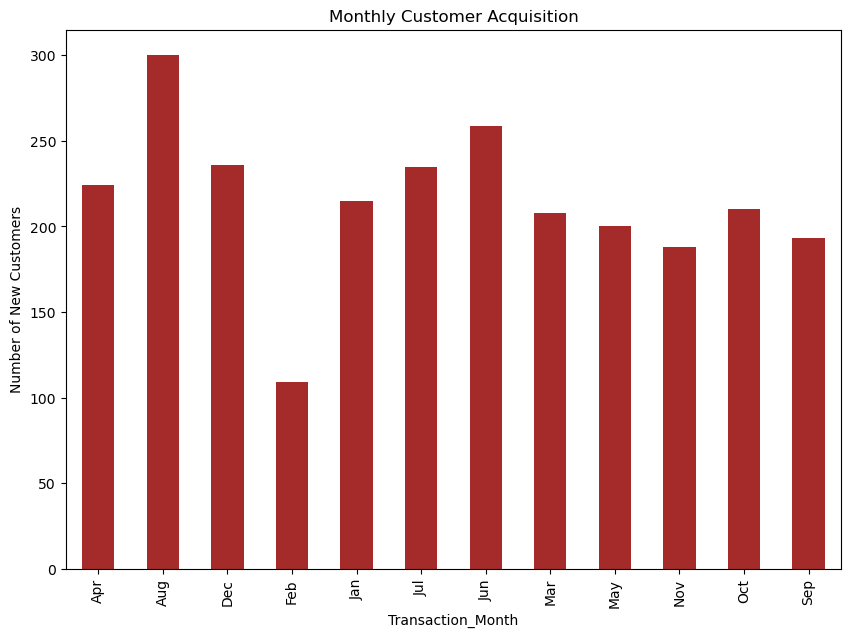

In [42]:
monthly_acquisition = sales_df.groupby('Transaction_Month')['CustomerID'].nunique()

plt.figure(figsize = (10,7))
monthly_acquisition.plot(kind='bar', title='Monthly Customer Acquisition', color = "brown")
plt.xlabel('Transaction_Month')
plt.ylabel('Number of New Customers')
plt.show()

##### Understand the retention of customers on month on month basis

In [43]:
sales_df['Cohort'] = sales_df.groupby('CustomerID')['Transaction_Date'].transform('min').dt.to_period('M')

In [44]:
sales_df['Cohort']

0        2019-01
1        2019-01
2        2019-01
3        2019-01
4        2019-01
          ...   
52519    2019-12
52520    2019-01
52521    2019-12
52522    2019-07
52523    2019-02
Name: Cohort, Length: 52524, dtype: period[M]

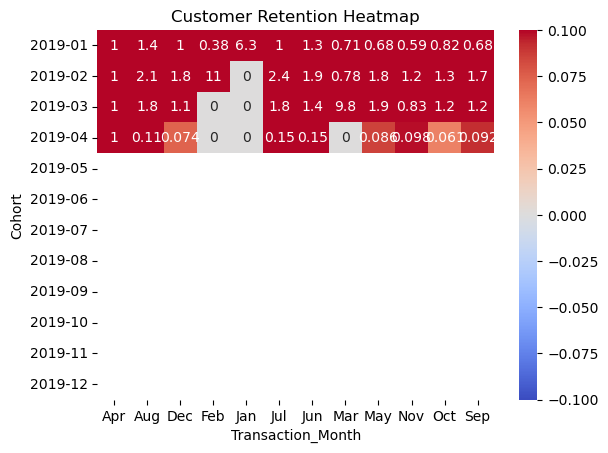

In [45]:
cohort_data = sales_df.groupby(['Cohort', 'Transaction_Month'])['CustomerID'].nunique().unstack().fillna(0)

retention_rate = cohort_data.divide(cohort_data.iloc[:, 0], axis=0)

# Plot the retention heatmap
sns.heatmap(retention_rate, annot=True, cmap='coolwarm')
plt.title('Customer Retention Heatmap')
plt.show()

##### How the revenues from existing/new customers on month on month basis

In [46]:
sales_df['Customer_Status'] = sales_df.groupby('CustomerID')['Transaction_Date'].transform(
    lambda x: ['New' if date == x.min() else 'Exist' for date in x])

In [47]:
monthly_revenue = sales_df.groupby(['Transaction_Month', 'Customer_Status'])['Invoice_Value'].sum().unstack()

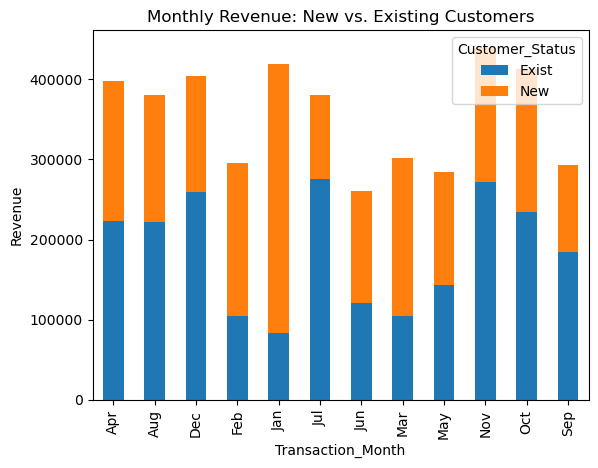

In [48]:
monthly_revenue.plot(kind='bar', stacked=True, title='Monthly Revenue: New vs. Existing Customers')
plt.xlabel('Transaction_Month')
plt.ylabel('Revenue')
plt.show()

##### How the discounts playing role in the revenues?

In [49]:
discount_impact = sales_df.groupby('Discount_pct')['Invoice_Value'].sum()
discount_impact

Discount_pct
10    1.612722e+06
20    1.399639e+06
30    1.259692e+06
Name: Invoice_Value, dtype: float64

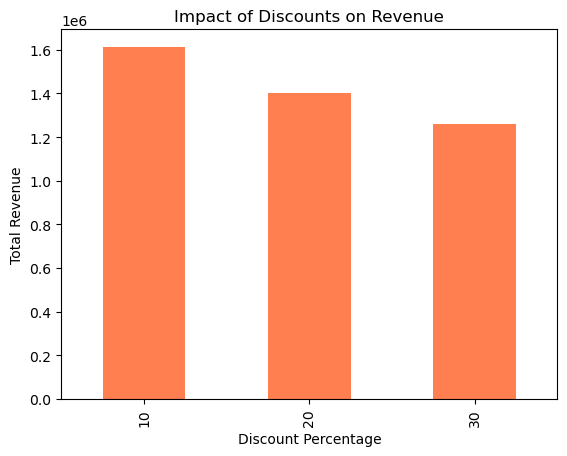

In [50]:
discount_impact.plot(kind='bar', title='Impact of Discounts on Revenue', color = "coral")
plt.xlabel('Discount Percentage')
plt.ylabel('Total Revenue')
plt.show()

##### Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…

In [51]:
orders_by_month = sales_df.groupby('Transaction_Month')['Transaction_ID'].nunique()

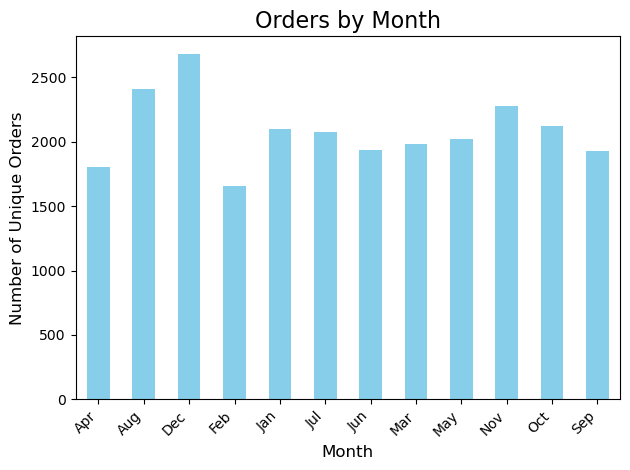

In [52]:
orders_by_month.plot(kind='bar', color='skyblue')
plt.title("Orders by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Unique Orders", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [53]:
average_order_value = sales_df.groupby('Transaction_Month')['Invoice_Value'].mean()

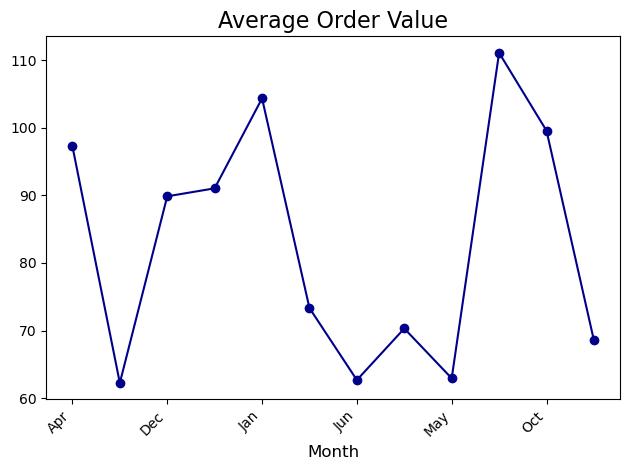

In [54]:
average_order_value.plot(kind='line', color='darkblue', marker = 'o')
plt.title("Average Order Value", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [55]:
quantity_by_category = sales_df.groupby('Product_Category')['Quantity'].sum()

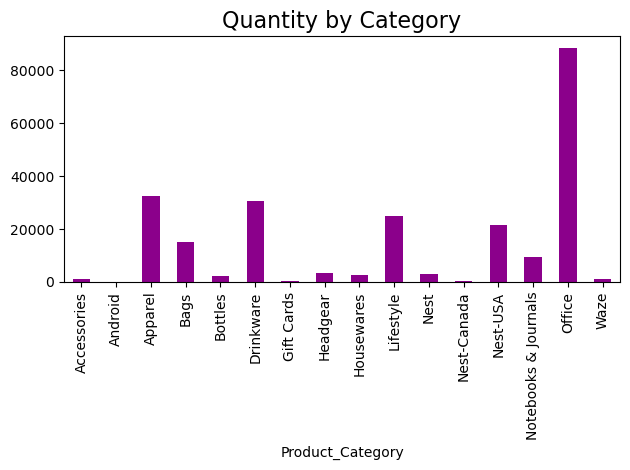

In [56]:
quantity_by_category.plot(kind='bar', color='darkmagenta')
plt.title("Quantity by Category", fontsize=16)
plt.tight_layout()
plt.show()

In [57]:
revenue_by_category_month = sales_df.groupby(['Transaction_Month', 'Product_Category'])['Invoice_Value'].sum().unstack()

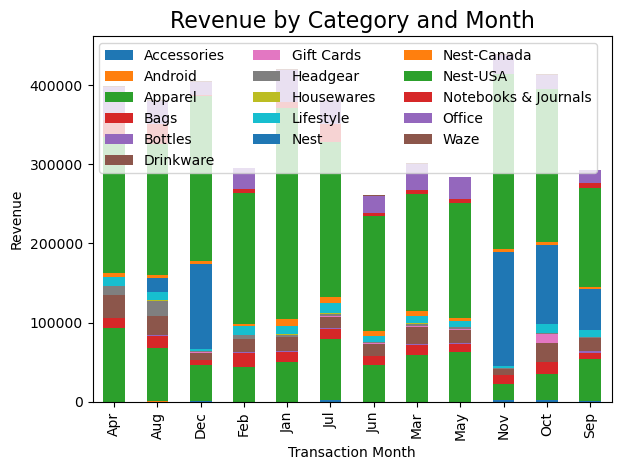

In [58]:
revenue_by_category_month.plot(kind='bar', stacked = True)
plt.legend(loc = 'upper left', ncol = 3)
plt.title("Revenue by Category and Month", fontsize=16)
plt.xlabel("Transaction Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

In [59]:
sales_df['Week_Year'] = sales_df['Transaction_Date'].dt.to_period('W')

In [107]:
sales_df['Week_Year']

0        2018-12-31/2019-01-06
1        2018-12-31/2019-01-06
2        2018-12-31/2019-01-06
3        2018-12-31/2019-01-06
4        2018-12-31/2019-01-06
                 ...          
52519    2019-12-16/2019-12-22
52520    2019-12-16/2019-12-22
52521    2019-12-23/2019-12-29
52522    2019-12-23/2019-12-29
52523    2019-12-23/2019-12-29
Name: Week_Year, Length: 52524, dtype: period[W-SUN]

In [60]:
revenue_by_week = sales_df.groupby('Week_Year')['Invoice_Value'].sum()

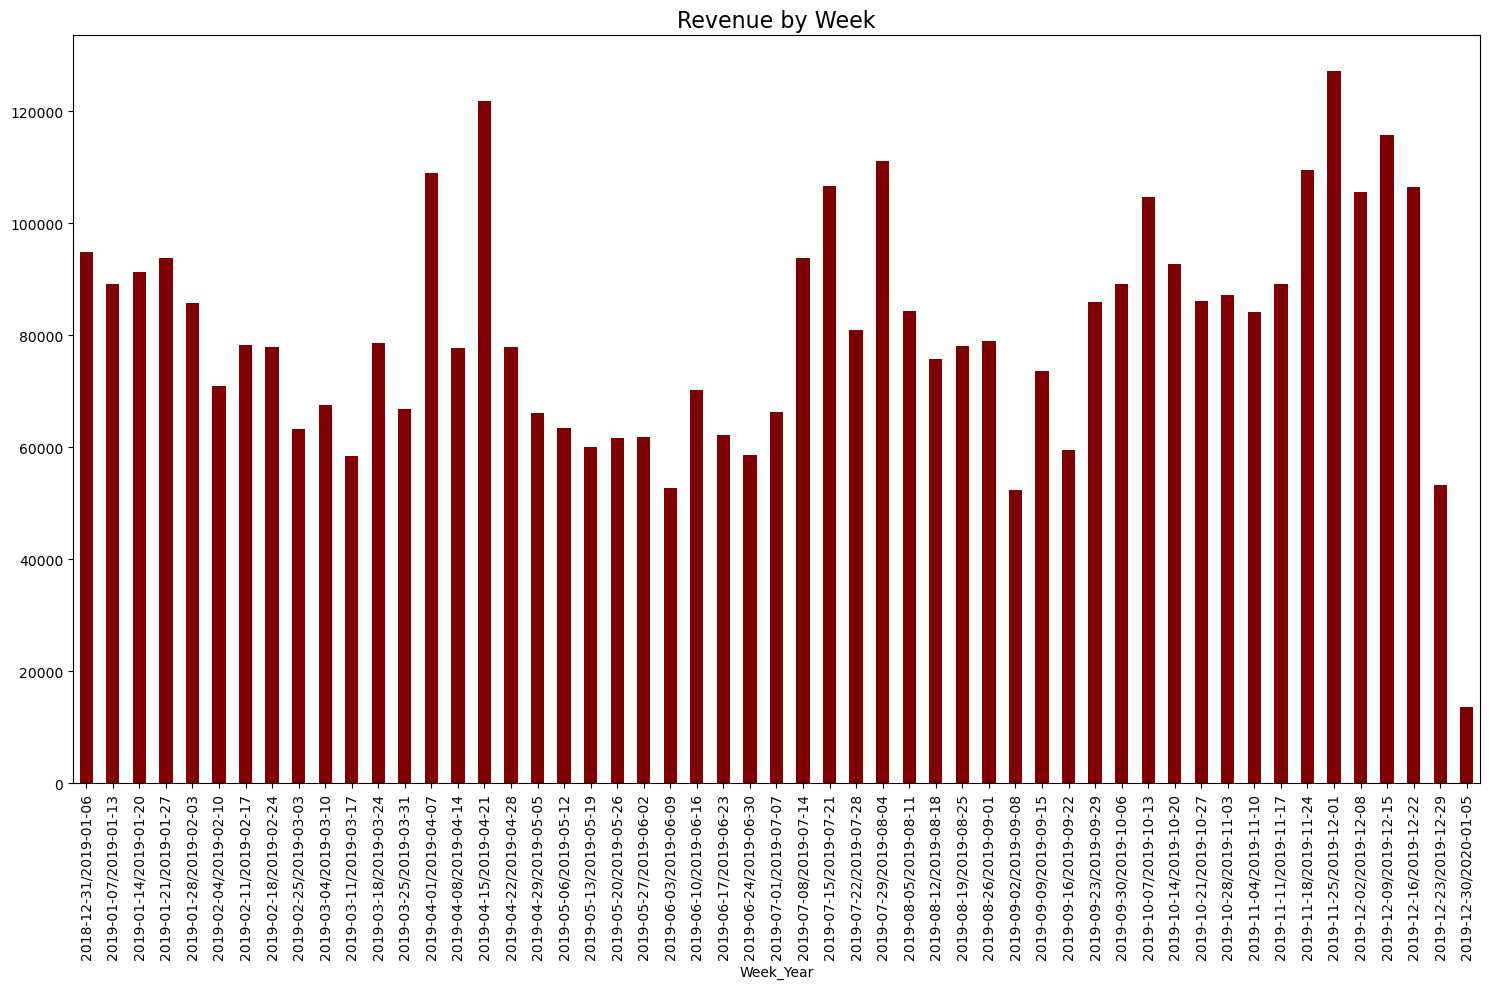

In [113]:
plt.figure(figsize = (15,10))
revenue_by_week.plot(kind='bar', color='maroon')
plt.title("Revenue by Week", fontsize=16)
plt.tight_layout()
plt.show()

In [61]:
sales_df['Day_of_Week'] = sales_df['Transaction_Date'].dt.day_name()

In [62]:
revenue_by_day = sales_df.groupby('Day_of_Week')['Invoice_Value'].sum()

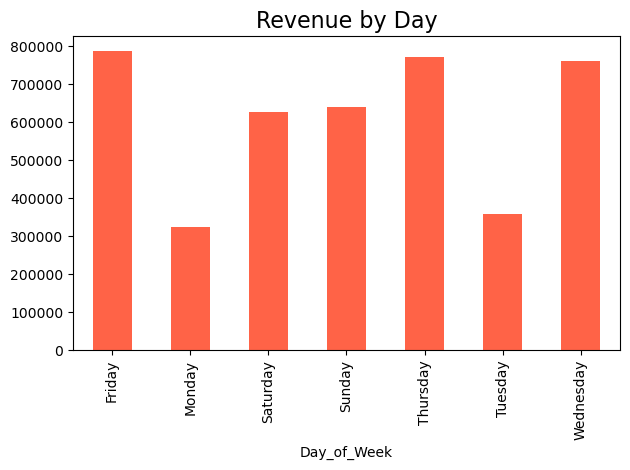

In [114]:
revenue_by_day.plot(kind='bar', color='tomato')
plt.title("Revenue by Day", fontsize=16)
plt.tight_layout()
plt.show()

In [63]:
orders_by_category_month = sales_df.groupby(['Transaction_Month', 'Product_Category'])['Transaction_ID'].nunique().unstack()

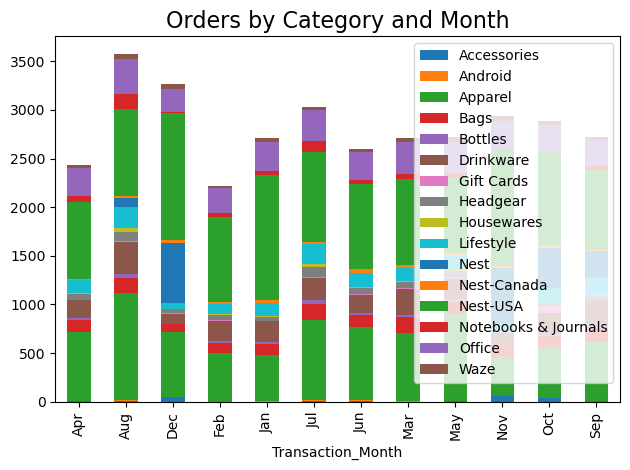

In [120]:
orders_by_category_month.plot(kind='bar', stacked = True)
plt.legend(loc = 'upper right')
plt.title("Orders by Category and Month", fontsize=16)
plt.tight_layout()
plt.show()

In [64]:
quantity_by_category_month = sales_df.groupby(['Transaction_Month', 'Product_Category'])['Quantity'].sum().unstack()

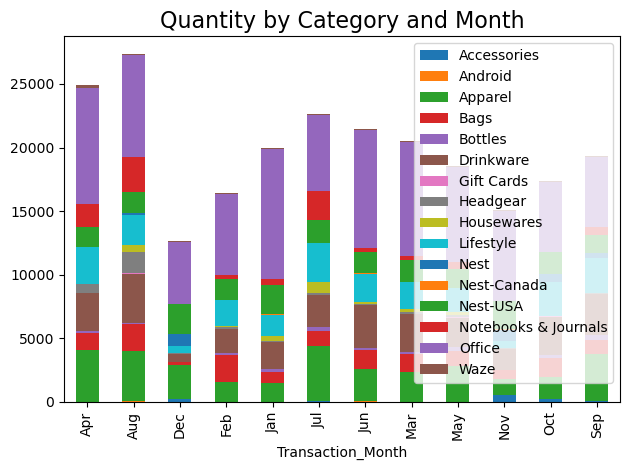

In [127]:
quantity_by_category_month.plot(kind='bar', stacked = True)
plt.legend(loc = 'upper right' )
plt.title("Quantity by Category and Month", fontsize=16)
plt.tight_layout()
plt.show()

In [65]:
quantity_by_day = sales_df.groupby('Day_of_Week')['Quantity'].sum()

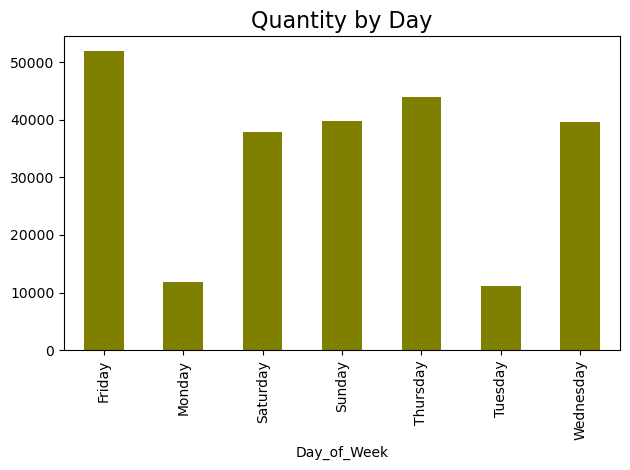

In [128]:
quantity_by_day.plot(kind='bar', color='olive')
plt.title("Quantity by Day", fontsize=16)
plt.tight_layout()
plt.show()

##### Understand the trends/seasonality of sales by category, location, month etc…

In [66]:
sales_trends = sales_df.groupby(['Transaction_Month', 'Product_Category'])['Invoice_Value'].sum().unstack()
location_sales = sales_df.groupby('Location')['Invoice_Value'].sum()

In [67]:
sales_trends

Product_Category,Accessories,Android,Apparel,Bags,Bottles,Drinkware,Gift Cards,Headgear,Housewares,Lifestyle,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
Transaction_Month,,,,,,,,,,,,,,,,
Apr,175.414264,49.017982,93317.379787,12014.270749,696.440050,28046.273497,652.826250,11692.777570,170.143960,11187.592792,NaN,5298.858900,171060.563700,22022.726539,41258.688642,885.406839
Aug,325.736128,127.868904,67260.202883,15506.461104,683.969548,24045.965814,600.300000,18483.591304,985.101760,11055.174016,17144.998400,4172.760000,164823.926800,25699.345884,28684.630632,907.264301
Dec,957.939829,NaN,45045.616544,7336.378511,NaN,8862.822126,560.371045,1281.455874,NaN,2118.769003,107580.098082,3933.806903,208507.437084,756.169876,16687.889892,887.641300
Feb,NaN,22.507992,43672.627730,18549.896152,493.673172,16869.547277,320.160000,4306.732992,152.845190,11152.783898,NaN,3379.324400,164381.537752,5801.446348,25650.043928,652.247842
Jan,52.959413,92.882816,50063.020409,12893.500881,1021.964285,17574.701526,255.448660,2614.813018,1485.795838,9348.491562,NaN,9057.440999,266720.437872,7226.385433,40403.388550,947.225092
Jul,1794.270124,152.423319,76911.886720,12741.780476,1485.184557,14362.913426,450.225000,2897.646892,1356.384948,12793.587908,NaN,7239.624000,196234.751900,22843.106319,29344.776504,369.777373
Jun,201.546411,174.450330,46644.492673,10426.111886,630.502732,15037.131770,840.420000,1394.953893,380.909460,6924.971139,NaN,6853.429900,144546.199100,4132.133865,21859.176684,633.757013
Mar,48.534993,207.522151,58462.488365,13439.022519,553.609743,22297.027532,262.631250,2950.675486,812.936140,9784.652066,NaN,5578.729800,148137.940000,4510.454214,33389.722184,1165.244261
May,162.854912,103.633560,62621.485296,9691.568706,1291.952736,16568.670920,1060.530000,2995.127944,536.639040,6994.290534,NaN,3224.878800,145714.007200,5597.501152,26890.053936,755.484818


In [68]:
location_sales

Location
California       1.319500e+06
Chicago          1.483489e+06
New Jersey       3.681030e+05
New York         8.665257e+05
Washington DC    2.344350e+05
Name: Invoice_Value, dtype: float64

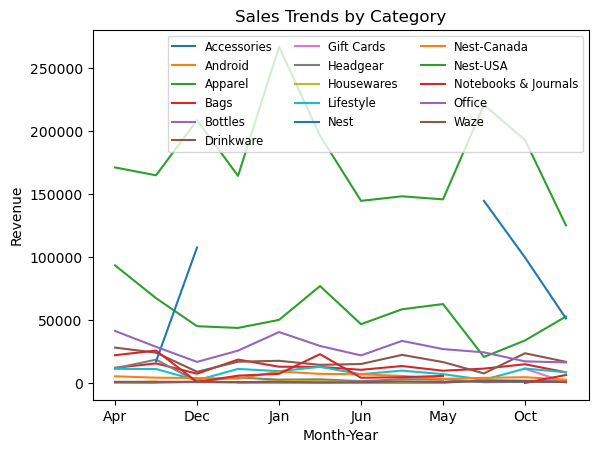

In [69]:
sales_trends.plot(kind='line', title='Sales Trends by Category')
plt.legend(loc='upper right',fontsize='small',ncol=3)
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.show()

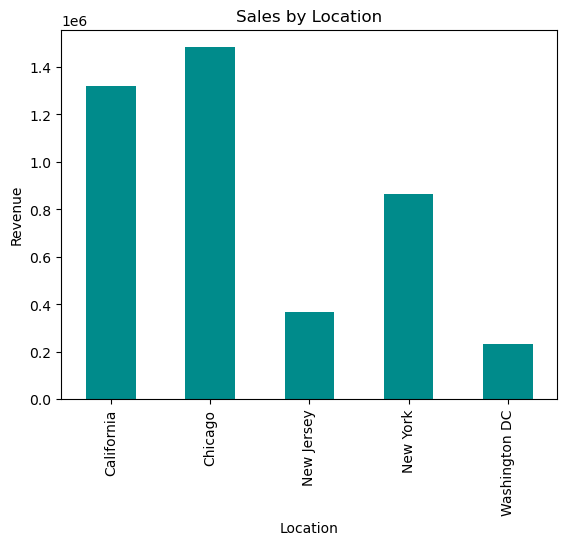

In [70]:
location_sales.plot(kind='bar', title='Sales by Location', color = 'darkcyan')
plt.xlabel('Location')
plt.ylabel('Revenue')
plt.show()

##### How number order varies and sales with different days?

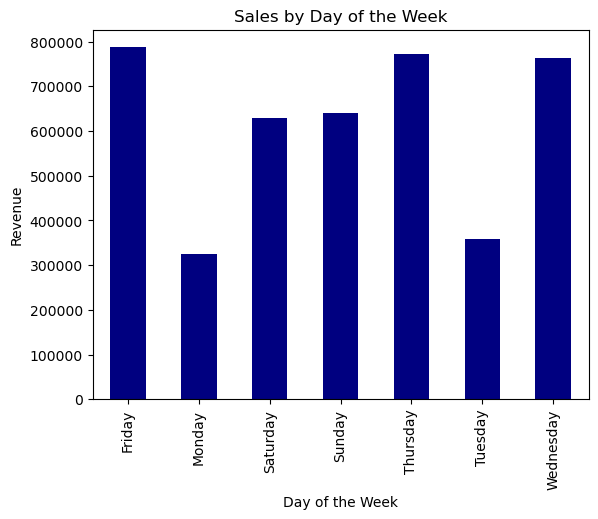

In [71]:
sales_by_day = sales_df.groupby('Day_of_Week')['Invoice_Value'].sum()

sales_by_day.plot(kind='bar', title='Sales by Day of the Week', color = 'navy')
plt.xlabel('Day of the Week')
plt.ylabel('Revenue')
plt.show()

##### Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.


In [72]:
financial_summary = sales_df.groupby('Transaction_Month').agg({'Invoice_Value': 'sum','Offline_Spend': 'sum','Online_Spend': 'sum','GST': 'mean', 'Delivery_Charges': 'sum'})

In [73]:
financial_summary['Marketing_Spend'] = financial_summary['Offline_Spend'] + financial_summary['Online_Spend']
financial_summary['Marketing_Percent'] = financial_summary['Marketing_Spend'] / financial_summary['Invoice_Value'] * 100
financial_summary['Tax_Percent'] = financial_summary['GST']
financial_summary['Delivery_Charges_Percent'] = financial_summary['Delivery_Charges'] / financial_summary['Invoice_Value'] * 100

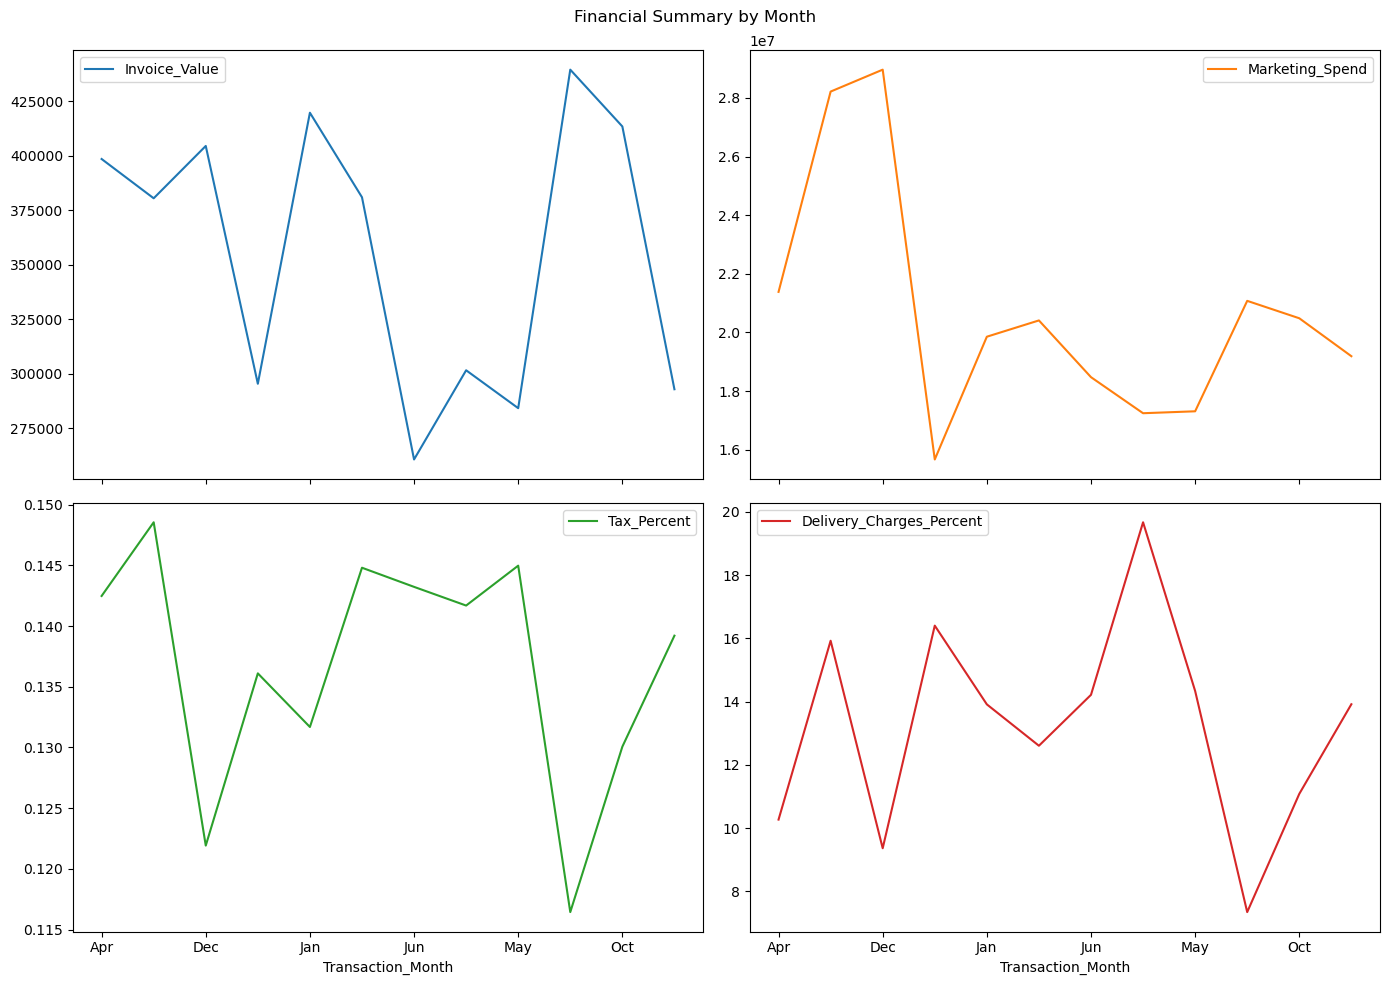

In [74]:
financial_summary[['Invoice_Value', 'Marketing_Spend', 'Tax_Percent', 'Delivery_Charges_Percent']].plot(kind='line', subplots=True, layout=(2, 2), figsize=(14, 10), title='Financial Summary by Month')
plt.tight_layout()
plt.show()

##### How marketing spend is impacting on revenue?

In [75]:
correlation = financial_summary[['Invoice_Value', 'Marketing_Spend']].corr()

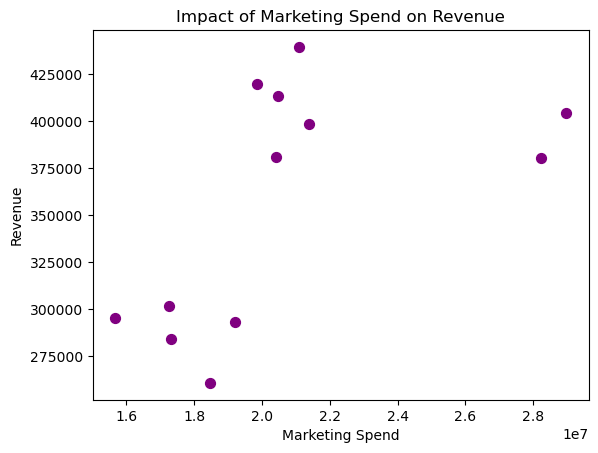

In [76]:
financial_summary.plot(kind='scatter', x='Marketing_Spend', y='Invoice_Value', title='Impact of Marketing Spend on Revenue', color = 'purple', s = 50)
plt.xlabel('Marketing Spend')
plt.ylabel('Revenue')
plt.show()

##### Which product was appeared in the transactions?

In [77]:
product_appearance = sales_df['Product_Category'].value_counts()

In [78]:
product_appearance

Product_Category
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Gift Cards                159
Housewares                122
Android                    43
Name: count, dtype: int64

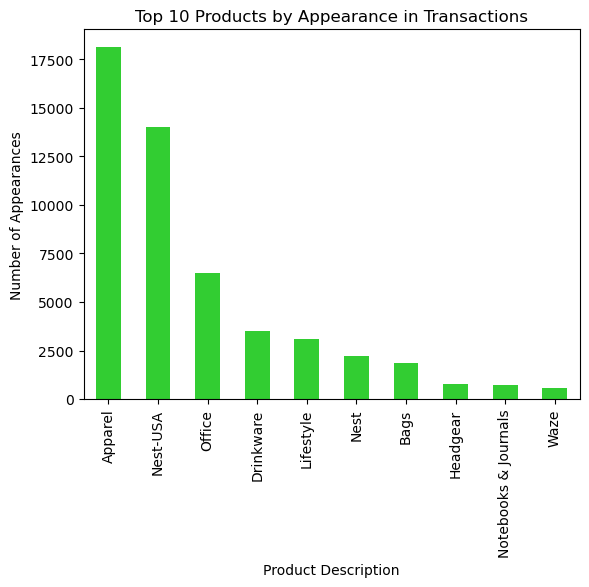

In [79]:
product_appearance.head(10).plot(kind='bar', title='Top 10 Products by Appearance in Transactions', color = 'limegreen')
plt.xlabel('Product Description')
plt.ylabel('Number of Appearances')
plt.show()

##### Which product was purchased mostly based on the quantity?

In [80]:
most_purchased_products = sales_df.groupby('Product_Category')['Quantity'].sum().sort_values(ascending=False)

In [81]:
most_purchased_products

Product_Category
Office                  88383
Apparel                 32438
Drinkware               30501
Lifestyle               24881
Nest-USA                21430
Bags                    15273
Notebooks & Journals     9556
Headgear                 3533
Nest                     2837
Housewares               2484
Bottles                  2090
Waze                     1144
Accessories              1097
Nest-Canada               469
Gift Cards                206
Android                    45
Name: Quantity, dtype: int64

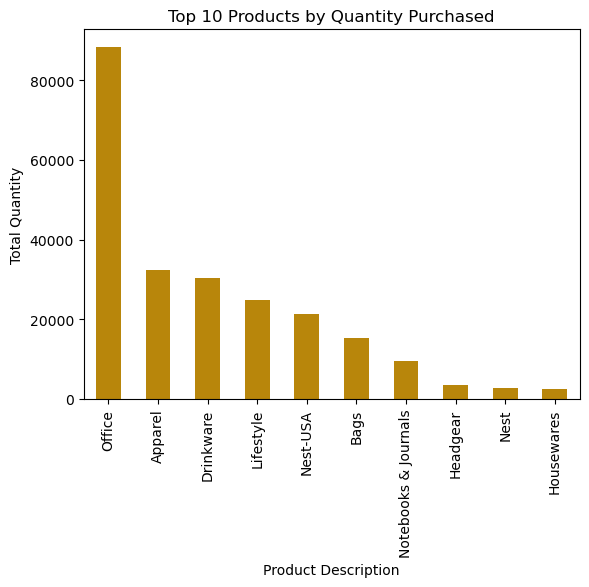

In [82]:
most_purchased_products.head(10).plot(kind='bar', title='Top 10 Products by Quantity Purchased', color = 'darkgoldenrod')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity')
plt.show()

##### 3. Performing Customer Segmentation

##### Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same.

In [83]:
current_date = sales_df['Transaction_Date'].max()
rfm = sales_df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (current_date - x.max()).days,
    'Transaction_ID': 'nunique',
    'Invoice_Value': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [84]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [85]:
def rfm_segment(df):
    if df['RFM_Score'] == '444':
        return 'Premium'
    elif df['RFM_Score'] >= '344':
        return 'Gold'
    elif df['RFM_Score'] >= '244':
        return 'Silver'
    else:
        return 'Standard'

rfm['Customer_Segment'] = rfm.apply(rfm_segment, axis=1)

Customer_Segment
Standard    679
Gold        344
Silver      323
Premium     122
Name: count, dtype: int64


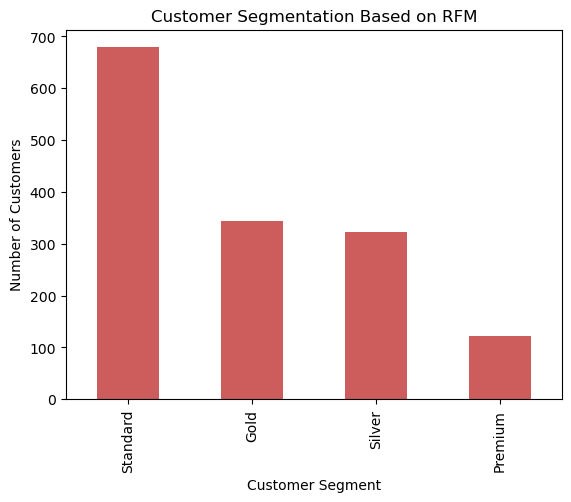

In [86]:
segment_distribution = rfm['Customer_Segment'].value_counts()
print(segment_distribution)

segment_distribution.plot(kind='bar', title='Customer Segmentation Based on RFM', color = 'indianred')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()

##### Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.

In [87]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

C:\Users\sandisk\AnacondaPy\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sandisk\AnacondaPy\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sandisk\AnacondaPy\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sandisk\AnacondaPy\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

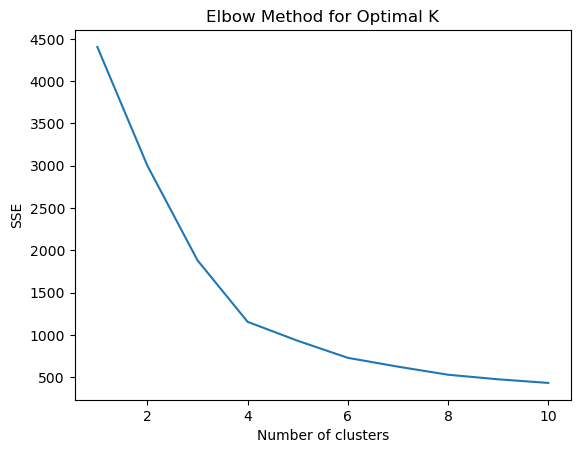

In [88]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

C:\Users\sandisk\AnacondaPy\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans_Cluster
1    745
0    546
3    171
2      6
Name: count, dtype: int64


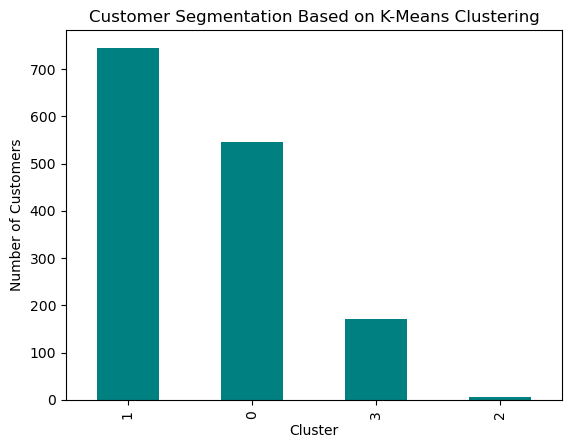

In [89]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyze cluster distribution
cluster_distribution = rfm['KMeans_Cluster'].value_counts()
print(cluster_distribution)

# Plot cluster distribution
cluster_distribution.plot(kind='bar', title='Customer Segmentation Based on K-Means Clustering', color ='teal')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

##### Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

##### First define dependent variable with categories low value, medium value, high value using customer revenue

##### Then perform Classification model

In [90]:
customer_revenue = sales_df.groupby('CustomerID')['Invoice_Value'].sum().reset_index()
customer_revenue.columns = ['CustomerID', 'Total_Revenue']

In [91]:
customer_revenue['CLTV_Category'] = pd.qcut(customer_revenue['Total_Revenue'], 3, labels=['Low', 'Medium', 'High'])

In [92]:
customer_features = sales_df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (current_date - x.max()).days,
    'Transaction_ID': 'nunique',
    'Quantity': 'sum',
    'Avg_Price': 'mean'
}).reset_index()

customer_features.columns = ['CustomerID', 'Recency', 'Frequency', 'Total_Quantity', 'Avg_Price']

# Merge with customer revenue data
customer_data = pd.merge(customer_features, customer_revenue, on='CustomerID')

In [93]:
X = customer_data[['Recency', 'Frequency', 'Total_Quantity', 'Avg_Price']]
y = customer_data['CLTV_Category']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [96]:
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

              precision    recall  f1-score   support

        High       0.91      0.90      0.90       149
         Low       0.87      0.93      0.90       141
      Medium       0.82      0.77      0.80       151

    accuracy                           0.87       441
   macro avg       0.87      0.87      0.87       441
weighted avg       0.87      0.87      0.87       441

[[134   0  15]
 [  0 131  10]
 [ 14  20 117]]


Frequency         0.485515
Total_Quantity    0.265398
Avg_Price         0.171175
Recency           0.077911
dtype: float64


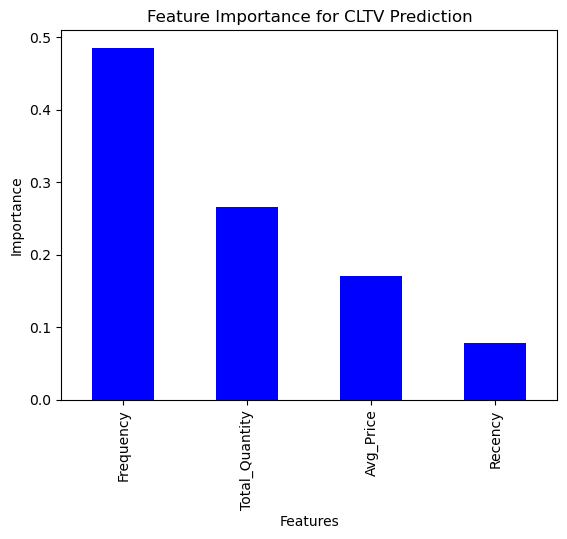

In [97]:
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

feature_importance.plot(kind='bar', title='Feature Importance for CLTV Prediction', color = 'blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

##### Cross-Selling (Which products are selling together)

##### You can perform exploratory analysis & market basket analysis to understand which of items can be bundled together.

In [103]:
basket = sales_df.groupby(['Transaction_ID', 'Product_Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Transaction_ID')

basket = basket.applymap(lambda x: 1 if x > 0 else 0)

basket.head()

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,Android 17oz Stainless Steel Sport Bottle,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
16679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

print(frequent_itemsets.head())

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules.head()

C:\Users\sandisk\AnacondaPy\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


   support                              itemsets
0  0.01632  (26 oz Double Wall Insulated Bottle)
1  0.01032          (8 pc Android Sticker Sheet)
2  0.01000              (Android Rise 14 oz Mug)
3  0.01392                      (BLM Sweatshirt)
4  0.01020                        (Badge Holder)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.12920,0.13312,0.02772,0.214551,1.611712,0.010521,1.103675,0.435854
1,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.13312,0.12920,0.02772,0.208233,1.611712,0.010521,1.099819,0.437825


In [100]:
rules = rules.sort_values('lift', ascending=False)

In [101]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.12920,0.13312,0.02772,0.214551,1.611712,0.010521,1.103675,0.435854
1,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.13312,0.12920,0.02772,0.208233,1.611712,0.010521,1.099819,0.437825


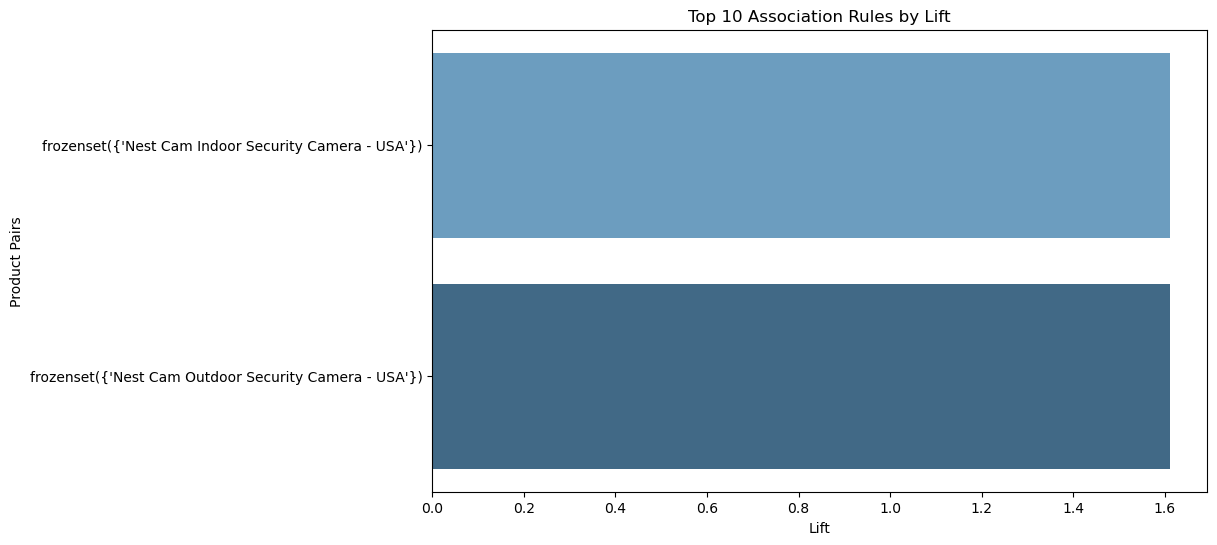

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y='antecedents', data=rules.head(10), palette='Blues_d')
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Product Pairs')
plt.show()

##### Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days)

##### For this, we need create dependent variable at customer level (average days per one transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 60-90 days and 90+ days) then build classification model to predict next purchase of given customer.

In [129]:
sales_df = sales_df.sort_values(by=['CustomerID', 'Transaction_Date'])

In [ ]:
sales_df['Days_Between'] = sales_df.groupby('CustomerID')['Transaction_Date'].diff().dt.days

In [ ]:
sales_df = sales_df.dropna(subset=['Days_Between'])

In [ ]:
avg_days_per_transaction = sales_df.groupby('CustomerID')['Days_Between'].mean().reset_index()
avg_days_per_transaction.columns = ['CustomerID', 'Avg_Days_Between']

In [130]:
def assign_next_purchase_bucket(days):
    if days <= 30:
        return '0-30'
    elif days <= 60:
        return '30-60'
    elif days <= 90:
        return '60-90'
    else:
        return '90+'

avg_days_per_transaction['Next_Purchase_Bucket'] = avg_days_per_transaction['Avg_Days_Between'].apply(assign_next_purchase_bucket)

In [131]:
avg_days_per_transaction.head()

,CustomerID,Avg_Days_Between,Next_Purchase_Bucket
0,12346,0.000000,0-30
1,12347,3.844828,0-30
2,12348,5.409091,0-30
3,12350,0.000000,0-30
4,12356,0.000000,0-30


In [132]:
customer_features = sales_df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (sales_df['Transaction_Date'].max() - x.max()).days,
    'Transaction_ID': 'nunique',
    'Quantity': 'sum',
    'Invoice_Value': 'mean'
}).reset_index()

In [133]:
customer_features.columns = ['CustomerID', 'Recency', 'Frequency', 'Total_Quantity', 'Avg_Order_Value']

In [134]:
customer_data = pd.merge(customer_features, avg_days_per_transaction, on='CustomerID')

In [135]:
customer_data.head()

,CustomerID,Recency,Frequency,Total_Quantity,Avg_Order_Value,Avg_Days_Between,Next_Purchase_Bucket
0,12346,107,1,1,89.018187,0.000000,0-30
1,12347,59,31,339,180.915234,3.844828,0-30
2,12348,73,8,208,60.630874,5.409091,0-30
3,12350,17,10,20,60.502783,0.000000,0-30
4,12356,107,13,54,46.862263,0.000000,0-30


In [136]:
X = customer_data[['Recency', 'Frequency', 'Total_Quantity', 'Avg_Order_Value']]
y = customer_data['Next_Purchase_Bucket']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [137]:
clf = RandomForestClassifier(random_state=42)

In [138]:
# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [139]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        0-30       0.99      1.00      0.99       415
       30-60       0.00      0.00      0.00         3
       60-90       0.00      0.00      0.00         1
         90+       0.00      0.00      0.00         2

    accuracy                           0.99       421
   macro avg       0.25      0.25      0.25       421
weighted avg       0.97      0.99      0.98       421



C:\Users\sandisk\AnacondaPy\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sandisk\AnacondaPy\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sandisk\AnacondaPy\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[415   0   0   0]
 [  3   0   0   0]
 [  1   0   0   0]
 [  2   0   0   0]]


In [142]:
importances = clf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

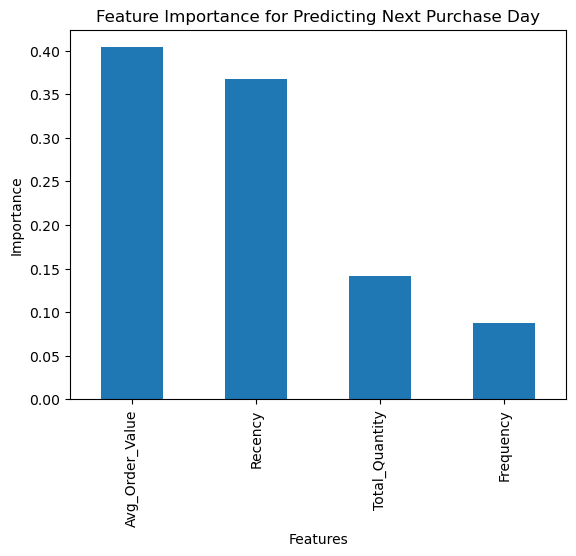

In [143]:
# Plot feature importance
feature_importance.plot(kind='bar', title='Feature Importance for Predicting Next Purchase Day')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [145]:
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}

In [146]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')

In [147]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [148]:
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


##### Perform cohort analysis by defining below cohort

##### Customers who started in each month and understand their behaviour

In [149]:
# Create a cohort column for the first purchase month

sales_df['Cohort_Month'] = sales_df.groupby('CustomerID')['Transaction_Date'].transform('min').dt.to_period('M')

In [150]:
print(sales_df[['CustomerID', 'Transaction_Date', 'Cohort_Month', 'Transaction_Month']].head())

       CustomerID Transaction_Date Cohort_Month Transaction_Month
38313       12346       2019-09-15      2019-09               Sep
8089        12347       2019-03-24      2019-03               Mar
8090        12347       2019-03-24      2019-03               Mar
8091        12347       2019-03-24      2019-03               Mar
8092        12347       2019-03-24      2019-03               Mar


In [151]:
cohort_data = sales_df.groupby(['Cohort_Month', 'Transaction_Month']).agg({ 'CustomerID': 'nunique'}).reset_index()

In [152]:
cohort_pivot = cohort_data.pivot_table(index='Cohort_Month', columns='Transaction_Month', values='CustomerID')

In [153]:
cohort_size = cohort_pivot.iloc[:, 0]

In [154]:
retention = cohort_pivot.divide(cohort_size, axis=0)

In [155]:
retention.head()

Transaction_Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Cohort_Month,,,,,,,,,,,,
2019-01,1.0,1.433333,1.066667,0.366667,6.5,0.966667,1.300000,0.733333,0.733333,0.633333,0.800000,0.733333
2019-02,1.0,1.800000,1.500000,9.500000,NaN,2.000000,1.700000,0.700000,1.600000,1.200000,1.300000,1.600000
2019-03,1.0,1.937500,1.187500,NaN,NaN,1.937500,1.562500,10.375000,2.125000,0.812500,1.250000,1.312500
2019-04,1.0,0.120000,0.086667,NaN,NaN,0.166667,0.153333,NaN,0.086667,0.113333,0.073333,0.086667
2019-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


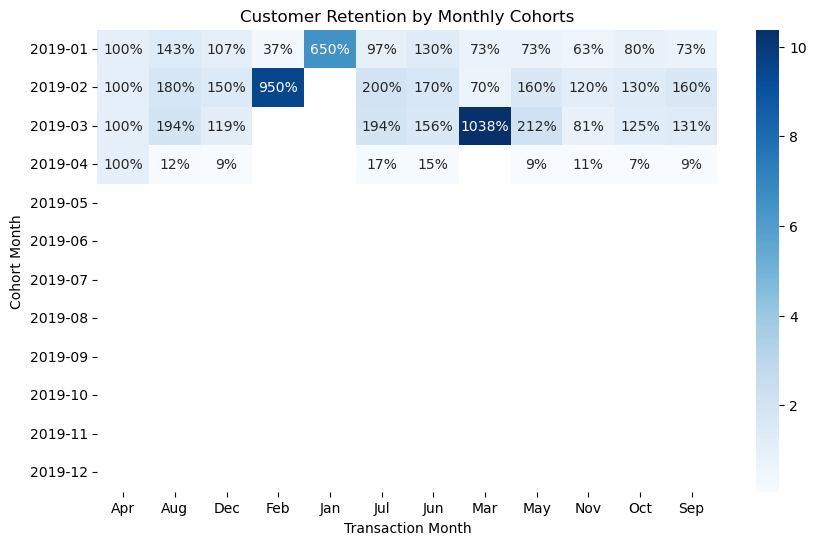

In [158]:
plt.figure(figsize=(10, 6))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='Blues')
plt.title('Customer Retention by Monthly Cohorts')
plt.ylabel('Cohort Month')
plt.xlabel('Transaction Month')
plt.show()

In [ ]:
#The heatmap shows how well each cohort retains customers over time. 
#A steep decline means most customers churn quickly, while a slower decline indicates better retention.

In [159]:
cohort_revenue = sales_df.groupby(['Cohort_Month', 'Transaction_Month']).agg({'Invoice_Value': 'sum'}).reset_index()

In [160]:
cohort_revenue_pivot = cohort_revenue.pivot_table(index='Cohort_Month', columns='Transaction_Month', values='Invoice_Value')

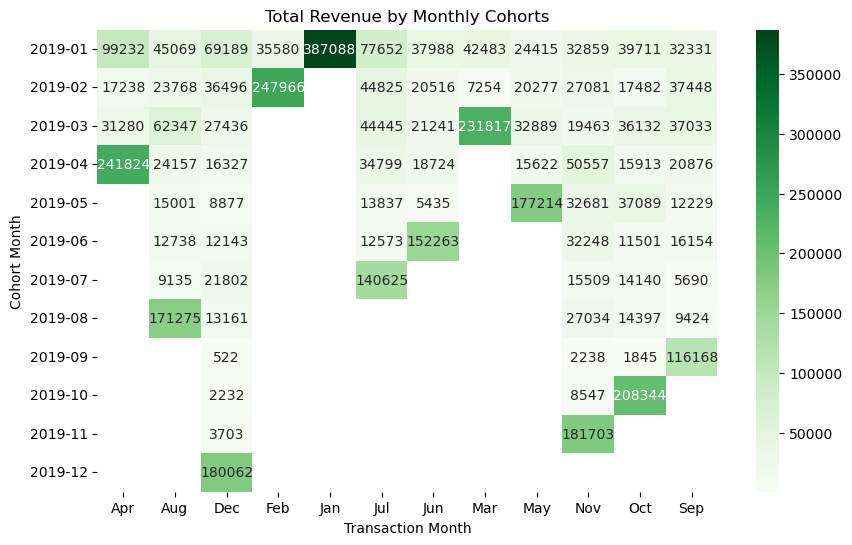

In [162]:
plt.figure(figsize=(10, 6))
sns.heatmap(cohort_revenue_pivot, annot=True, fmt='.0f', cmap='Greens')
plt.title('Total Revenue by Monthly Cohorts')
plt.ylabel('Cohort Month')
plt.xlabel('Transaction Month')
plt.show()

In [ ]:
#The revenue heatmap shows how much each cohort contributes to overall sales over time. 
#Certain cohorts may generate more revenue due to higher average order values or better retention.

In [163]:
#Calculate the number of orders and total revenue
cohort_aov_data = sales_df.groupby(['Cohort_Month', 'Transaction_Month']).agg({ 'Transaction_ID': 'nunique', 'Invoice_Value': 'sum'}).reset_index()

In [164]:
cohort_aov_data['AOV'] = cohort_aov_data['Invoice_Value'] / cohort_aov_data['Transaction_ID']

In [165]:
cohort_aov_pivot = cohort_aov_data.pivot_table(index='Cohort_Month', columns='Transaction_Month', values='AOV')

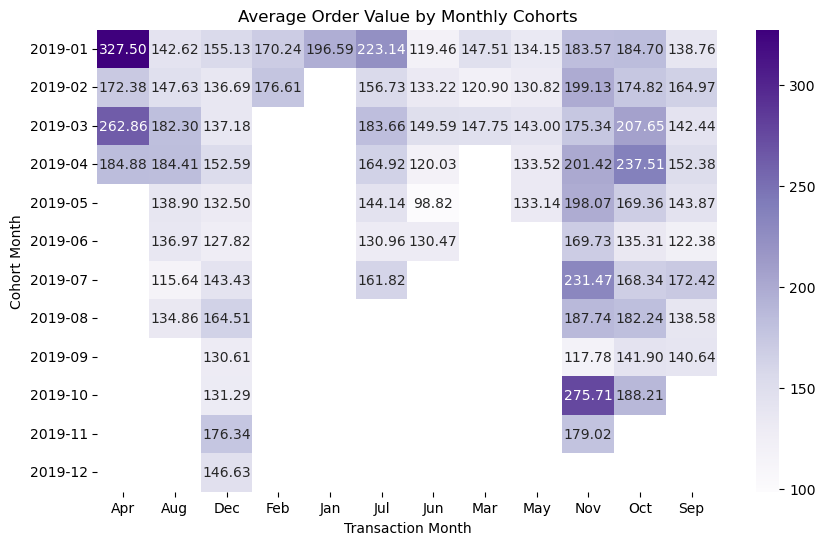

In [167]:
plt.figure(figsize=(10, 6))
sns.heatmap(cohort_aov_pivot, annot=True, fmt='.2f', cmap='Purples')
plt.title('Average Order Value by Monthly Cohorts')
plt.ylabel('Cohort Month')
plt.xlabel('Transaction Month')
plt.show()

In [ ]:
#This metric reveals how much each cohort spends per order. 
#High AOV could indicate that cohorts contain more premium customers, or they make larger purchases.

##### Which Month cohort has maximum retention?

In [168]:
retention.head()

Transaction_Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Cohort_Month,,,,,,,,,,,,
2019-01,1.0,1.433333,1.066667,0.366667,6.5,0.966667,1.300000,0.733333,0.733333,0.633333,0.800000,0.733333
2019-02,1.0,1.800000,1.500000,9.500000,NaN,2.000000,1.700000,0.700000,1.600000,1.200000,1.300000,1.600000
2019-03,1.0,1.937500,1.187500,NaN,NaN,1.937500,1.562500,10.375000,2.125000,0.812500,1.250000,1.312500
2019-04,1.0,0.120000,0.086667,NaN,NaN,0.166667,0.153333,NaN,0.086667,0.113333,0.073333,0.086667
2019-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
average_retention = retention.mean(axis=1)

In [170]:
max_retention_cohort = average_retention.idxmax()

In [171]:
print(f'Cohort with Maximum Retention: {max_retention_cohort}')
print(f'Maximum Retention Rate: {average_retention[max_retention_cohort]:.2%}')

Cohort with Maximum Retention: 2019-03
Maximum Retention Rate: 235.00%


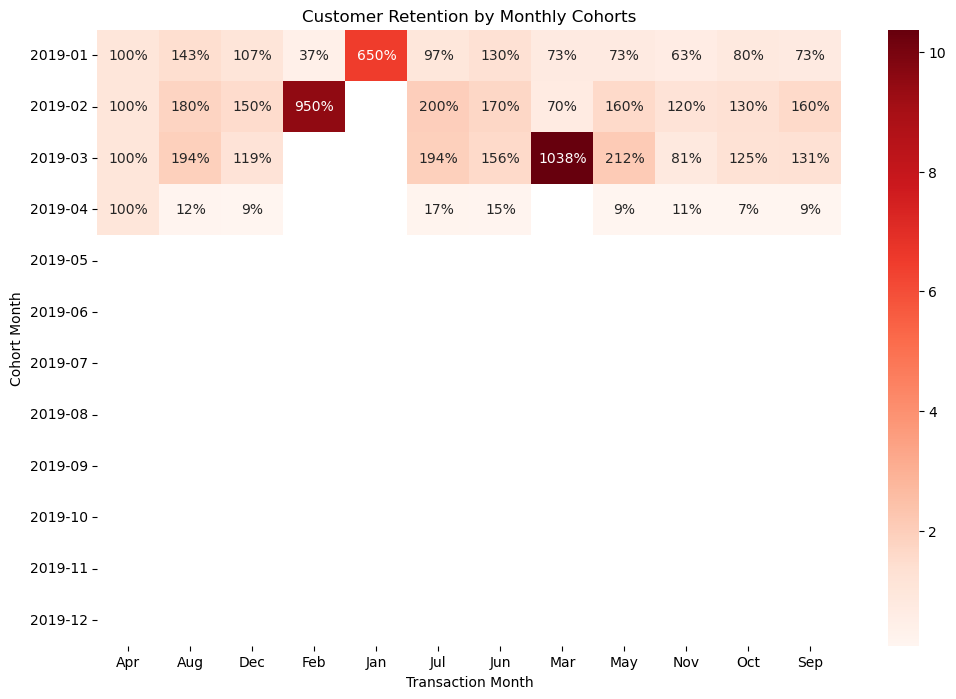

In [178]:
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='Reds')
plt.title('Customer Retention by Monthly Cohorts')
plt.ylabel('Cohort Month')
plt.xlabel('Transaction Month')
plt.show()